MovieWriter ffmpeg unavailable; using Pillow instead.


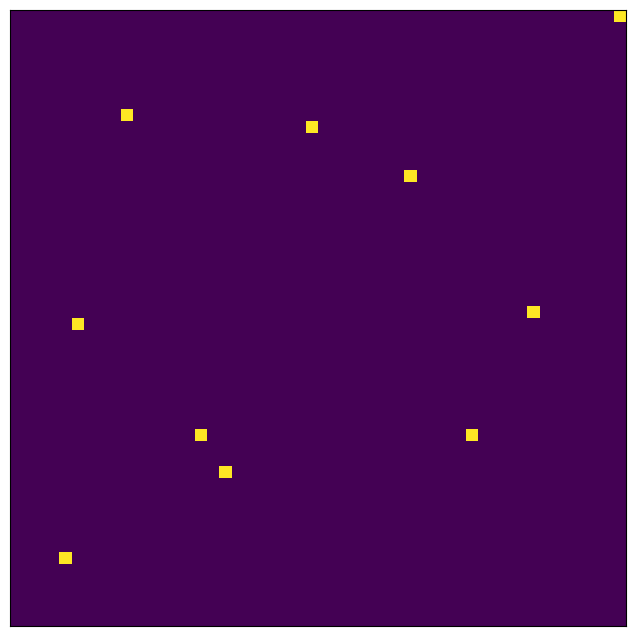

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Размер поля
FIELD_SIZE = 50

# Начальное количество бактерий
INITIAL_BACTERIA = 10

# Вероятность деления бактерий
DIVISION_PROBABILITY = 0.1

# Вероятность гибели бактерий
DEATH_PROBABILITY = 0.01

# Вероятность загрязнения среды
POLLUTION_PROBABILITY = 0.01

# Создаем поле
field = np.zeros((FIELD_SIZE, FIELD_SIZE), dtype=int)

# Размещаем начальное количество бактерий
bacteria = np.random.randint(0, FIELD_SIZE, size=(INITIAL_BACTERIA, 2))
for x, y in bacteria:
    field[x, y] = 1

# Функция для обновления поля
def update_field(frame):
    global field

    # Создаем новое поле
    new_field = np.zeros_like(field)

    # Обрабатываем каждую ячейку
    for i in range(FIELD_SIZE):
        for j in range(FIELD_SIZE):
            # Проверяем, есть ли бактерия в ячейке
            if field[i, j] == 1:
                # Вычисляем количество соседних ячеек с бактериями
                neighbors = sum([
                    field[max(0, i-1):min(FIELD_SIZE, i+2), max(0, j-1):min(FIELD_SIZE, j+2)].sum()
                ]) - field[i, j]

                # Деление бактерий
                if neighbors > 0 and np.random.rand() < DIVISION_PROBABILITY:
                    new_field[i, j] = 1
                    new_field[max(0, i-1):min(FIELD_SIZE, i+2), max(0, j-1):min(FIELD_SIZE, j+2)] += 1
                # Гибель бактерий
                elif np.random.rand() < DEATH_PROBABILITY:
                    continue
                else:
                    new_field[i, j] = 1

    # Обновляем поле
    field = new_field

    # Загрязнение среды
    if np.random.rand() < POLLUTION_PROBABILITY:
        field = np.zeros_like(field)
    return [plt.imshow(field)]

# Создаем анимацию
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xticks([])
ax.set_yticks([])
ani = animation.FuncAnimation(fig, update_field, frames=10, interval=100, blit=True)

# Сохраняем анимацию в файл
ani.save('bacteria_growth.gif')

plt.show()